nx(w), nz(w),nx(2w),nz(2w)
1.5644315257162176 1.6708717681798857 1.6211845488175407 1.7439010568217512
Crystal type: positive Uniaxial
theta_c: 48.31203486940273 d_eff: 1.18832729006033
Correlation time: 2.1493108231519822e-14 s
Photon Count: 9856156.704156563 s^-1 mW^-1 mm^-1


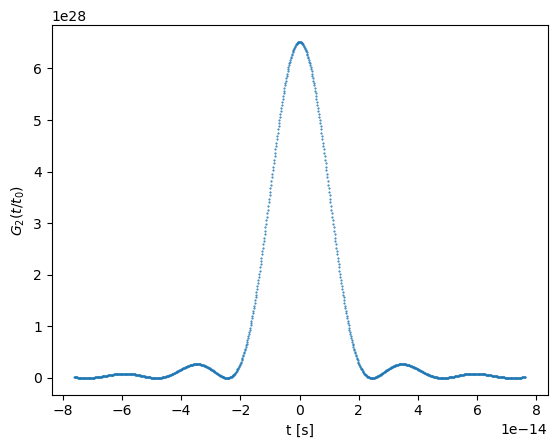

In [3]:
# -*- coding: utf-8 -*-
"""
Created on Tue May  2 12:08:47 2023

@author: burto
"""
import numpy as np
import math as mt
import sympy as sym
import matplotlib.pyplot as plt
from numpy import *
from numpy import genfromtxt
from matplotlib import pyplot as plt
from fractions import Fraction as F
from scipy.optimize import leastsq
import scipy as sc
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import sympy as sym
import csv
from scipy.integrate import quad

my_data = genfromtxt('HUTZAX01.csv', delimiter='')
f=my_data[:,3] # Third column of this file is de deff in PV/m
def Deff_NEG(f,g1):
    import sympy as sym
    #h,g=PhaseMatchingAngle(1064,sellmeier1,sellmeier2)
    #g1=np.round(g,2)
    X=np.zeros((3,3))
    m=np.split(f,3)
    X1=m[0]
    n=np.split(X1,3)
    X2=n[0]
    X3=n[1]
    X4=n[2]
    for i in range(0,3):
        X[0,i]=X2[i]
        X[1,i]=X3[i]
        X[2,i]=X4[i]

    Y=np.zeros((3,3))
    m=np.split(f,3)
    X1=m[1]
    n=np.split(X1,3)
    X2=n[0]
    X3=n[1]
    X4=n[2]
    for i in range(0,3):
        Y[0,i]=X2[i]
        Y[1,i]=X3[i]
        Y[2,i]=X4[i]
    Z=np.zeros((3,3))
    m=np.split(f,3)
    X1=m[2]
    n=np.split(X1,3)
    X2=n[0]
    X3=n[1]
    X4=n[2]
    for i in range(0,3):
        Z[0,i]=X2[i]
        Z[1,i]=X3[i]
        Z[2,i]=X4[i]

    T=[X,Y,Z]
    T1=array(T)

#    print(T1[1,0,0])
#    print(T1)
#    print(T1.shape)


    θ, ϕ = sym.symbols('θ ϕ')


    a=[ sym.sin(ϕ),-sym.cos(ϕ) , 0 ]
    b=[ -sym.cos(θ)*sym.cos(ϕ) ,-sym.cos(θ)*sym.sin(ϕ) , sym.sin(θ) ]

#print(a[0])
#print(b)
# This is for a negative uniaxial crystal
    result=0
    for i in range(3):
        for j in range(3):
            for k in range(3):
                result += b[i]*T1[i,j,k]*a[j]*a[k]
    θ, ϕ = sym.symbols('θ ϕ')

    #    return -0.939*sin(θ)*sin(ϕ)**2 - 0.6976*sin(θ)*sin(ϕ)*cos(ϕ) + 0.939*sin(θ)*cos(ϕ)**2 + 3.555e-

#    print(result)
    result1=result.subs(θ,radians(g1))
#    print(result1)
    D=[]
    I=[]

    for i in range(0,180):
        D.append(abs(result1.subs(ϕ,radians(i))))
        I.append(i)

    D1=[D,I]
#    plt.plot(I,D)
    for i in range(len(D)):
      if max(D)==D[i]:
        max1=I[i]
      if min(D)==D[i]:
        min1=I[i]
    return max(D)
##########################
def Deff_POS(f,g1):
    import sympy as sym
    #h,g=PhaseMatchingAngle(1064,sellmeier1,sellmeier2)
    #g1=np.round(g,2)
    X=np.zeros((3,3))
    m=np.split(f,3)
    X1=m[0]
    n=np.split(X1,3)
    X2=n[0]
    X3=n[1]
    X4=n[2]
    for i in range(0,3):
        X[0,i]=X2[i]
        X[1,i]=X3[i]
        X[2,i]=X4[i]

    Y=np.zeros((3,3))
    m=np.split(f,3)
    X1=m[1]
    n=np.split(X1,3)
    X2=n[0]
    X3=n[1]
    X4=n[2]
    for i in range(0,3):
        Y[0,i]=X2[i]
        Y[1,i]=X3[i]
        Y[2,i]=X4[i]
    Z=np.zeros((3,3))
    m=np.split(f,3)
    X1=m[2]
    n=np.split(X1,3)
    X2=n[0]
    X3=n[1]
    X4=n[2]
    for i in range(0,3):
        Z[0,i]=X2[i]
        Z[1,i]=X3[i]
        Z[2,i]=X4[i]

    T=[X,Y,Z]
    T1=array(T)

#    print(T1[1,0,0])
#    print(T1)
#    print(T1.shape)


    θ, ϕ = sym.symbols('θ ϕ')


    a=[ sym.sin(ϕ),-sym.cos(ϕ) , 0 ]
    b=[ -sym.cos(θ)*sym.cos(ϕ) ,-sym.cos(θ)*sym.sin(ϕ) , sym.sin(θ) ]

#print(a[0])
#print(b)
# This is for a negative uniaxial crystal
    result=0
    for i in range(3):
        for j in range(3):
            for k in range(3):
                #print(i,j,k)
                #print(T1[i,j,k]*Ew[j]*E2w[k]*Ew[i])
                result += a[i]*T1[i,j,k]*b[j]*b[k]

    θ, ϕ = sym.symbols('θ ϕ')

    #    return -0.939*sin(θ)*sin(ϕ)**2 - 0.6976*sin(θ)*sin(ϕ)*cos(ϕ) + 0.939*sin(θ)*cos(ϕ)**2 + 3.555e-

#    print(result)
    result1=result.subs(θ,radians(g1))
#    print(result1)
    D=[]
    I=[]

    for i in range(0,180):
        D.append(abs(result1.subs(ϕ,radians(i))))
        I.append(i)

    D1=[D,I]
#    plt.plot(I,D)
    for i in range(len(D)):
      if max(D)==D[i]:
        max1=I[i]
      if min(D)==D[i]:
        min1=I[i]
    return max(D)

######################################################
x1=sym.symbols('x1')
c=sym.symbols('c')
my_data =  genfromtxt('HUTZAX01.txt1', delimiter='')
#def funcSell(x, A, B, C, D):
#    return ((A)+ B/(x**2-C) - D*x**2)

#def Sell(x1, A, B, C, D):
#    return math.sqrt((A)+ B/(x1**2-C) - D*x1**2)


def funcSell(x, A, B1, C1, B2, C2):
    return ((A)+(((x**2)*B1)/((x**2)-C1))+(((x**2)*B2)/((x**2)-C2)))

def Sell(x1, A, B1, C1, B2, C2):
    return math.sqrt(((A)+(((x1**2)*B1)/((x1**2)-C1))+(((x1**2)*B2)/((x1**2)-C2))))



def dielectric():
    bg=4.3819
    x=1239.84193/bg
    y=1100
    z=2000
    f=my_data[:,0]
    xx=my_data[:,1]
    yy=my_data[:,2]
    zz=my_data[:,3]

    f1=[]
    zz2=[]
    xx2=[]
    yy2=[]

    if len(zz)==len(xx):
        for i in range(0,len(f)):
            if bg>=f[i]>=1.12713: # This limit was due to the CASTEP file, but in Crystal one can have
                f1.append((round(1239.84193/f[i],2)))# Tranform frecuency in eV to nm wavelength
                a=round((xx[i]),6)
                b=round((yy[i]),6)
                c=round((zz[i]),6)
                zz2.append(c)
                xx2.append(a)
                yy2.append(b)

    X = np.linspace(x, y, z)

    constantsSell, _ = sc.optimize.curve_fit(funcSell, f1, xx2, maxfev=9999990, xtol=1e-8)
    Y3=funcSell(X,*constantsSell)
    constantsSell1, _ = sc.optimize.curve_fit(funcSell, f1, zz2, maxfev=9999990, xtol=1e-8)
    Y4=funcSell(X,*constantsSell1)
    constantsSell2, _ = sc.optimize.curve_fit(funcSell, f1, yy2, maxfev=9999990, xtol=1e-8)
    Y4=funcSell(X,*constantsSell2)

    nx = [constantsSell[0],constantsSell[1],constantsSell[2],constantsSell[3],constantsSell[4]]
    ny = [constantsSell2[0],constantsSell2[1],constantsSell2[2],constantsSell2[3],constantsSell2[4]]
    nz = [constantsSell1[0],constantsSell1[1],constantsSell1[2],constantsSell1[3],constantsSell1[4]]
    return nx,ny,nz
#######################################################
nx, ny, nz =dielectric()
#nz =[1.7904651598466805, 0.05460624769454377, 91607.55007814994, 0.8105872457802059, 39695.810041926314]
#nx =[2.010363328440273, 0.017750282020272998, 103541.8012539858, 0.9268891080565168, 52126.34901563138]

#X2 = np.zeros((3,9))
x=sym.symbols('x')

#def Sell(l, A, B1, C1, B2, C2):
#    return mt.sqrt(((A)+(((l**2)*B1)/((l**2)-C1))+(((l**2)*B2)/((l**2)-C2))))
def Sell2(x, A, B1, C1, B2, C2):
        return sym.sqrt(((A)+(((x**2)*B1)/((x**2)-C1))+(((x**2)*B2)/((x**2)-C2))))


omega=1064
omega2=1064/2
#print("omega",omega,"2omega",omega2)
#print((Sell(omega,*nx))**1,(Sell(omega,*ny))**1,(Sell(omega,*nz))**1,(Sell(omega2,*nx))**1,(Sell(omega2,*ny))**1,(Sell(omega2,*nz))**1)
print("nx(w), nz(w),nx(2w),nz(2w)")
print((Sell(omega,*nx))**1,(Sell(omega,*nz))**1,(Sell(omega2,*nx))**1,(Sell(omega2,*nz))**1)
    
lp = 532
l1 = lp*2
L = 1E-3
sigma_p = 0.875E-6
sigma_1 = 1.875E-6
P = 1E-3
pi = mt.pi
c=299792458
l = 532
lam_t = l
l1 = l*2

Do = sym.diff(Sell2(x,*nx))
De = sym.diff(Sell2(x,*nz))

ngo = Sell(l1,*nx)-l1*Do.subs(x,l1)
nge = Sell(l1,*nx)-l1*De.subs(x,l1)
vgo = c/ngo
vge = c/nge
ne_2w = Sell(l,*nz)
no_2w = Sell(l,*nx)
ne_w = Sell(l1,*nz)
no_w = Sell(l1,*nx)
ne = Sell2(l1,*nz)
no = Sell2(l1,*nx)

if no>ne:
    type_="negative"
else:
    type_="positive"


if type_=="negative":
    theta_c  = mt.asin(mt.sqrt(((ne_2w/no_w)**2)*(no_2w**2 - no_w**2)/(no_2w**2 -ne_2w**2)))

elif type_=="positive":
    theta_c  = mt.asin(mt.sqrt(((ne_w/no_2w)**2)*(no_w**2 - no_2w**2)/(no_w**2 -ne_w**2)))

theta_ = []
phi_ = np.linspace(0,180,num=180)
res__=[]
deff = []


if no>ne:
    deff_m = Deff_NEG(f,theta_c*180/np.pi)
else:
    deff_m = Deff_POS(f,theta_c*180/np.pi)
        
print("Crystal type:",type_,"Uniaxial")
print("theta_c:",theta_c*180/np.pi,"d_eff:",deff_m)
#exit

def ngo(l1):
    D = sym.diff(Sell2(x,*nx))
    a = Sell2(x,*nx)-l1*1E-3*(D)
    a = a.subs(x,l1)
    return a

def nge(l1):
    D = sym.diff(Sell2(x,*nz))
    a = Sell2(x,*nz)-l1*1E-3*(D)
    a = a.subs(x,l1)
    return a
def vgdo(l1):

    a = ((l1*1E-9)**3)/(2*mt.pi*c*c)
    D2 = sym.diff(Sell2(x,*nx))

    D3 = sym.diff(D2)*1E18
    # print(D3.subs(x,l1))
    Dl = a*D3
    Dl = Dl.subs(x,l1)
    return Dl


def vgde(l1):

    a = ((l1*1E-9)**3)/(2*mt.pi*c*c)
    D2 = sym.diff(Sell2(x,*nz))

    D3 = sym.diff(D2)*1E18
    # print(D3.subs(x,l1))
    Dl = a*D3
    Dl = Dl.subs(x,l1)
    return Dl

Vge = vgde(l1)
Vgo = vgdo(l1)
def sinc (D,L):
        # print(v,D,L)
        s = np.sin(D*L/2)

        s = (s*2) / (D*L)

        return s

def sinc2 (x,L):
        # print(v,D,L)
        s = sym.sin(x*L/2)

        s = (s*2) / (x*L)

        return s


if type_=='positive':

    n_1 = ne
    ng_ = nge(lp)
    n_p = Sell2(lp,*nx)

    wp = 2*mt.pi*c/  (lp*1E-9*n_p)
    w1 = 2*mt.pi*c/  (l1*1E-9*n_1)

    Vg = float(vgde(l1))
elif type_=='negative':

    Vg = float(vgdo(l1))
    n_1 = no
    n_p = Sell2(lp,*nz)
    ng_ = ngo(lp)
    wp = 2*mt.pi*c/  (lp*1E-9*n_p)
    w1 = 2*mt.pi*c/  (l1*1E-9*n_1)


"sinc function"
f= int(wp/2)

band = 10E-9
band =  c / (band)

def I(x,t):
    s = mt.sin((Vg*L/4)*x*x)
    s = s/((Vg*L/4)*x*x)
    a = np.exp(-x**2/band**2)
    b = np.exp(1j*x*t)

    inte = s*a*b
    return inte.real


def Ii(x,t):
    s = mt.sin((Vg*L/4)*x*x)
    s = s/((Vg*L/4)*x*x)
    a = np.exp(-x**2/band**2)
    b = np.exp(1j*x*t)

    inte = s*a*b
    return inte.imag


vo= mt.sqrt(4/(Vg*L))
tl = mt.sqrt(Vg*L/4)*10
tau = np.linspace(-tl,tl,1000)
G2 = []

for a in range(len(tau)):
    I1 = quad(I,-vo-vo/100,vo,args = (tau[a]))[0]
    I2 = quad(Ii,-vo-vo/100,vo,args = (tau[a]))[0]
    i_t = np.sqrt(I1.real**2+I2.real**2)**2
    i_t = np.sqrt(i_t**2)
    G2.append(i_t)

plt.plot(tau,G2,linestyle="",marker="o",markersize=0.5)
plt.xlabel("t [s]")
plt.ylabel("$G_2 (t / t_{0})$")


f_max = np.max(G2)

f_2 = f_max/2
val = []
num = []




i = np.argmin(np.abs(G2-f_2))
G2_fwhm= G2[i]
i_=[]
for a in range(len(G2)):
    if abs(G2_fwhm-G2[a])<np.min(G2)/1000000:
        i_.append(a)

fwhm = tau[i_[1]]-tau[i_[0]]
print("Correlation time:",fwhm, "s")

w1 = float(w1)
wp = float(wp)

Io = lambda h : (w1+h)*(wp-(w1+h))*np.sin((Vg*(w1+h -wp/2)**2)*0.001/2)*2/((Vg*(w1+h -wp/2)**2)*0.001)
Io1 = quad(Io, -f, f)
error = Io1[1]
Io1 = Io1[0]

deff_m = deff_m*1E-12

""" value of the review"""
# deff_m = 3.7*1E-12

eo = 8.8541878176E-12
P = 1E-3

Ep2 = P/(c*eo*mt.pi*n_1*sigma_p**2)
R1 = Ep2*(deff_m**2)*L*L/(2*mt.pi*c*c)
R2 = ng_*ng_/(n_1**4)
R3 = mt.sqrt(abs(sigma_p**2/(sigma_1**2 + 2*sigma_p**2)))

Rsm = float(R1*R2*R3*Io1)

#print("GVD:")
#print(Vg)
#print("Rsm:")
#print(Rsm)
print("Photon Count:",Rsm,"s^-1 mW^-1 mm^-1")